In [1]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install nlp-utils


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import re
import nltk
import string
import nlp_utils
import collections
import contractions
import nlp_utils as nu
from collections import Counter
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from wordcloud import wordcloud, STOPWORDS
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [6]:
# Loading data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd /content/drive/My Drive/Data Science/sentiment analysis

/content/drive/My Drive/Data Science/sentiment analysis


In [8]:
#dfs = pd.read_excel('Amazon_review2.xlsx')

In [9]:
#dfs

In [10]:
# drop extra columns

#dfs.drop(['product', 'title','rating'], axis=1, inplace=True)

In [11]:
#dfs=pd.DataFrame(dfs)

In [12]:
#dfs

In [13]:
#np.savetxt(r'amazon_reviews.txt', dfs.values, fmt='%s')

In [14]:
with open('amazon_reviews3.en.txt', 'r') as f:
  text = f.read()

In [15]:
text

'There are pros and cons. On the one hand, they are (relatively) small tablets, of course I can\'t say much about the content right now, I\'ll see that in about a month on the next blood count, maybe I\'ll update the review here. On the other hand, the tablets aren\'t coated and are more like chalky chewable tablets in texture, but are intended to be swallowed without crushing them, although the rougher the tablet, the more difficult it is to swallow - not ideal. On the other hand, the packaging and the price are very good maybe look around for others - the D3 Kwizda is of course unbeatable, but also a bit more expensive. For everyone else I see no problem here.\nI\'ve been taking the pills for months now. Before I got a cold every 4-8 weeks. Now everyone in the immediate vicinity can sneeze at my feet because of me. I get nothing more. I can only recommend.\nNo more bones cracking when you walk or feeling tired during the day with those vitamins! I recommend them if you have a vitamin

*** Text Normalization ***

Text normalization is the process of transforming a text into a canonical ( standard) form. For example, the word 'gooood' and 'gud' can be transformed to "good", its canonical form. Another example is mapping of near identical words such as "stopwords", "stop-words" and "stop words" to just "stopwords"

In [16]:
# splitting at (\n)
text = text.split('\n')

In [17]:
#splitting at (\t)
corpus = [text]
for sent in text:
  corpus.append(sent.split('\t'))
#splitting string by tab

In [18]:
letters_only = re.sub(r'[^a-zA-Z]',
                      " ",
                      str(corpus))
#taking only letters

*** Tokenization ***

What is Tokenization? Tokenization is the process by which big quantity of text is divided into smallar parts called tokens.

Natural language processing is used for building applications such as Text classification, intelligent chatbot, sentimental analysis, language translation etc. it becomes vital to understand the pattern in the text to achieve the above-stated purpose. These tokens are very useful for finding such paterns as well as is considered as a base step for stemming and lemmatization.

sentense tokenization is the process of splitting text into individual sentense. ... it does this by looking for the types of texttual constructs that confuse the tokenizer and replacing them with single words.

In [19]:
import nltk
nltk.download('punkt')
# converting to lower case

letters_only = letters_only.lower()

token = nltk.sent_tokenize(letters_only)
#token

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


*** Alphanumeric Character ***

In [20]:
def num_dec_al(word):
  if word.isnumeric():
    return 'xxxxxxx'
  elif word.isdecimal():
    return 'xxx...'
  elif word.isalpha():
    return word
  else:
    return 'xxxaaa'

def clean_nda(token):
  tokens = nltk.word_tokenize(token)
  map_list = list(map(num_dec_al, tokens))
  return " ".join(map_list)


corpus_nda = list(map(clean_nda, token))

#corpus_nda

# alpha numeric character and decimal have been replaced with characters

*** Removing Contractions ***

it is a process where words like isn't, didn't are expanded to is not did not. isn't--> is notm i'm -> I am 

In [21]:
conm = contractions.contractions_dict
def contraction_remove(corpus_nda):
  for key, value in conm.items():
    corpus_nda = re.sub(r"{}".format(key), '{}'.format(value),corpus_nda)
  return corpus_nda 

special = string.punctuation
def w_tokenization(corpus_nda):
  #convert into lower case
  corpus_nda = corpus_nda.lower()
  #contraction
  corpus_nda = contraction_remove(corpus_nda)
  tokens = nltk.word_tokenize(corpus_nda)

# contractions have been expanded and the letters have been converted to lower case


In [22]:
#corpus_nda

In [23]:
data = [corpus_nda]
for sent in text:
  data.append(sent.split('\t'))
#separating at tab

In [24]:
data.append(sent.split('\n'))
#separating at newline

In [25]:
df = pd.DataFrame(data)
## saving the data into a dataframe

In [26]:
df

,0
0,there are pros and cons on the one hand they a...
1,"There are pros and cons. On the one hand, they..."
2,I've been taking the pills for months now. Bef...
3,No more bones cracking when you walk or feelin...
4,The tablets are quite small. I take three to f...
...,...
988,So far so good. Good product and is certainly ...
989,Great product at a very fair price. The goods ...
990,The capsule is easy to swallow with some liqui...
991,


In [27]:
df = df.rename(columns={0:'Text'})
#renaming the column 0 as text

In [28]:
df.drop(df.index[991:], inplace=True)
#row 992 has repeated so it is dropped

In [29]:
df.drop(df.index[:1], inplace=True)
#row 1 has repeated so it is dropped

In [30]:
df

,Text
1,"There are pros and cons. On the one hand, they..."
2,I've been taking the pills for months now. Bef...
3,No more bones cracking when you walk or feelin...
4,The tablets are quite small. I take three to f...
5,We take 2 tablets of it every day and feel good.
...,...
986,Good quality organic capsules at a reasonable ...
987,Very fast delivery. Good value for money. The ...
988,So far so good. Good product and is certainly ...
989,Great product at a very fair price. The goods ...


In [31]:
# we can further see that see that there are still some special characters in the data frame which have to be treated.

df.replace('\d+', '', regex=True, inplace=True)
df.replace(',', '', regex=True, inplace= True)
df.replace('br', '', regex=True, inplace= True)
df.replace('"', '', regex=True, inplace= True)
df.replace("'", '', regex=True, inplace= True)
#df.replace('?', '', regex=True, inplace= True)
df.replace('-', '', regex=True, inplace= True)
df.replace('\*', '', regex=True, inplace= True)
#df.replace('***', '', regex=True, inplace= True)
df.replace('< />', '', regex=True, inplace= True)
#df.replace(':', '', regex=True, inplace= True)

'\ndf.replace(\'/\', \'\', regex=True, inplace= True) \n#df.replace(\'\',\'\', regex=True, inplace= True)\n\ndf.replace(",", \'\', regex=True, inplace= True)\n#df.replace("``", \'\', regex=True, inplace= True)\ndf.replace(".", \'\', regex=True, inplace= True)\n\ndf.replace("", \'\', regex=True, inplace= True)\ndf.replace(\'\', \'\', regex=True, inplace= True)\n#df.replace("", \'\', regex=True, inplace= True)\n#df.replace("", \'\', regex=True, inplace= True)\n'

In [32]:
df['Text'] = df['Text'].str.strip('[')
df['Text'] = df['Text'].str.strip(']')
df['Text'] = df['Text'].str.strip('(')
df['Text'] = df['Text'].str.strip(')')

# Using the strip function in order to delete the special characters.

In [33]:
df

,Text
1,There are pros and cons. On the one hand they ...
2,Ive been taking the pills for months now. Befo...
3,No more bones cracking when you walk or feelin...
4,The tablets are quite small. I take three to f...
5,We take tablets of it every day and feel good.
...,...
986,Good quality organic capsules at a reasonable ...
987,Very fast delivery. Good value for money. The ...
988,So far so good. Good product and is certainly ...
989,Great product at a very fair price. The goods ...


*** Lemmatization of the text column ***

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words. normally aiming to remove inflectional endings only and to return the base or dictionary from a word, which is known as the lemma. Lemmatization will generate the root from of the inflected words. 

In [34]:
'''
#df['Text'] = df['Text'].apply(nu.lemmatization_sentence)
nltk.download('omw-1.4')

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
#word_list = nltk.word_tokenize(df)
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in df['Text']])
'''

"\n#df['Text'] = df['Text'].apply(nu.lemmatization_sentence)\nnltk.download('omw-1.4')\n\n# Init the Wordnet Lemmatizer\nlemmatizer = WordNetLemmatizer()\n#word_list = nltk.word_tokenize(df)\nlemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in df['Text']])\n"

In [35]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
nltk.download('omw-1.4')

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df['Text'] = df['Text'].apply(lemmatize_text)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [36]:
Text = df['Text']

In [37]:
Text

1      [There, are, pro, and, cons., On, the, one, ha...
2      [Ive, been, taking, the, pill, for, month, now...
3      [No, more, bone, cracking, when, you, walk, or...
4      [The, tablet, are, quite, small., I, take, thr...
5      [We, take, tablet, of, it, every, day, and, fe...
                             ...                        
986    [Good, quality, organic, capsule, at, a, reaso...
987    [Very, fast, delivery., Good, value, for, mone...
988    [So, far, so, good., Good, product, and, is, c...
989    [Great, product, at, a, very, fair, price., Th...
990    [The, capsule, is, easy, to, swallow, with, so...
Name: Text, Length: 990, dtype: object

In [38]:
token = Text.to_numpy()

In [39]:
token = nltk.sent_tokenize(str(token))

In [40]:
data = np.array(token)

In [41]:
nltk.download('stopwords')

stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
text = data
text_tokens = word_tokenize(str(text))

tokens_without_sw = [word for word in text_tokens if not word in stop]
print(tokens_without_sw)

# removing stopwords from the text and printing the words without stopwords

['[', '``', '[', 'list', '(', '[', "'There", "'", ',', "'are", "'", ',', "'pro", "'", ',', "'and", "'", ',', "'cons", '.', "''", '``', "'", ',', "'On", "'", ',', "'the", "'", ',', "'one", "'", ',', "'hand", "'", ',', "'they", "'", ',', "'are", "'", ',', "'", '(', 'relatively', ')', "'", ',', "'small", "'", ',', "'tablet", "'", ',', "'of", "'", ',', "'course", "'", ',', "'", 'I', "'", ',', "'cant", "'", ',', "'say", "'", ',', "'much", "'", ',', "'about", "'", ',', "'the", "'", ',', "'content", "'", ',', "'right", "'", ',', "'now", "'", ',', "'Ill", "'", ',', "'see", "'", ',', "'that", "'", ',', "'in", "'", ',', "'about", "'", ',', "'", "'", ',', "'month", "'", ',', "'on", "'", ',', "'the", "'", ',', "'next", "'", ',', "'blood", "'", ',', "'count", "'", ',', "'maybe", "'", ',', "'Ill", "'", ',', "'update", "'", ',', "'the", "'", ',', "'review", "'", ',', "'here", '.', "''", '``', "'", ',', "'On", "'", ',', "'the", "'", ',', "'other", "'", ',', "'hand", "'", ',', "'the", "'", ',', "'table

In [43]:
# visualizations

stopwords = set(stopwords.words("english"))
#removing stopwords for wordcloud visualization

In [44]:
from wordcloud import WordCloud 
wordcloud = WordCloud(stopwords = stop, background_color="white", max_words = 1000). generate(str(tokens_without_sw))
#wordcloud is a technique to show which words are most frequent among the given text

*** Visualizing the highest repeating words in the dataframes using the word cloud

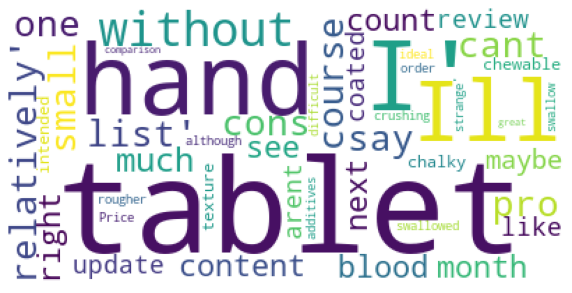

In [45]:
rcParams['figure.figsize']= 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

*** Counting the numbers of times a word has repeated through out the data ***

In [46]:
tokens_without_sw = (str(tokens_without_sw))

In [47]:
filtered_words = [word for word in tokens_without_sw.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
  words.append(letter)
  counts.append(count)

# Removing stopwords as creating two lists to display the words and their counts

In [48]:
#counted_words.most_common(100) 

[('"\'",', 104),
 ("',',", 98),
 ('"\'the",', 10),
 ("'``',", 6),
 ("'.',", 6),
 ('"\'\'",', 6),
 ('"\'are",', 4),
 ('"\'tablet",', 4),
 ('"\'in",', 3),
 ("'[',", 2),
 ("'(',", 2),
 ('"\'and",', 2),
 ('"\'On",', 2),
 ('"\'hand",', 2),
 ("')',", 2),
 ("'I',", 2),
 ('"\'about",', 2),
 ('"\'Ill",', 2),
 ('"\'other",', 2),
 ('"\'more",', 2),
 ('"\'to",', 2),
 ('"\'without",', 2),
 ("']',", 2),
 ("['[',", 1),
 ("'list',", 1),
 ('"\'There",', 1),
 ('"\'pro",', 1),
 ('"\'cons",', 1),
 ('"\'one",', 1),
 ('"\'they",', 1),
 ("'relatively',", 1),
 ('"\'small",', 1),
 ('"\'of",', 1),
 ('"\'course",', 1),
 ('"\'cant",', 1),
 ('"\'say",', 1),
 ('"\'much",', 1),
 ('"\'content",', 1),
 ('"\'right",', 1),
 ('"\'now",', 1),
 ('"\'see",', 1),
 ('"\'that",', 1),
 ('"\'month",', 1),
 ('"\'on",', 1),
 ('"\'next",', 1),
 ('"\'blood",', 1),
 ('"\'count",', 1),
 ('"\'maybe",', 1),
 ('"\'update",', 1),
 ('"\'review",', 1),
 ('"\'here",', 1),
 ('"\'arent",', 1),
 ('"\'coated",', 1),
 ('"\'like",', 1),
 ('"\'chal

In [49]:
# Bar graph....

*** Sentiment Analysis ***

sentiment analysis is done in order to find if a given word is positive or negative or neutral in nature. 

vader belongs to a type of sentiment analysis that is based on lexicons of sentiment related words. in this approch each of the words in the lexicon is rated as to whether it is positive or negative and in many cases, how positive or negative, below you can see an except fro  vader's lexicon where more positive words have higher positive ratings and more negative words have lower negative ratings. vader sentiment analysis for a given word if positive, negative or neutral in nature

In [50]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentence = tokens_without_sw
tokenized_sentence = nltk.word_tokenize(sentence)

sid = SentimentIntensityAnalyzer()

pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in tokenized_sentence:
  if(sid.polarity_scores(word)['compound']) >= 0.1:
    pos_word_list.append(word)
  elif(sid.polarity_scores(word)['compound']) <= -0.1:
    neg_word_list.append(word)
  else:
    neu_word_list.append(word)


In [52]:
pos_word_list[:50]

["'hand", "'hand", "'like", "'ideal", "'great"]

In [53]:
print(list(iter(pos_word_list[:100])))

["'hand", "'hand", "'like", "'ideal", "'great"]


In [54]:
# vader sentiment analysis for a given sentence if positive, negative or neutral in nature.

sid = SentimentIntensityAnalyzer()
for sen in Text:
  print(sen)

  ss = sid.polarity_scores(sen)
  for k in ss:
    print('{0}: {1} ' .format(k, ss[k]), end='')
    print()

['There', 'are', 'pro', 'and', 'cons.', 'On', 'the', 'one', 'hand', 'they', 'are', '(relatively)', 'small', 'tablet', 'of', 'course', 'I', 'cant', 'say', 'much', 'about', 'the', 'content', 'right', 'now', 'Ill', 'see', 'that', 'in', 'about', 'a', 'month', 'on', 'the', 'next', 'blood', 'count', 'maybe', 'Ill', 'update', 'the', 'review', 'here.', 'On', 'the', 'other', 'hand', 'the', 'tablet', 'arent', 'coated', 'and', 'are', 'more', 'like', 'chalky', 'chewable', 'tablet', 'in', 'texture', 'but', 'are', 'intended', 'to', 'be', 'swallowed', 'without', 'crushing', 'them', 'although', 'the', 'rougher', 'the', 'tablet', 'the', 'more', 'difficult', 'it', 'is', 'to', 'swallow', 'not', 'ideal.', 'On', 'the', 'other', 'hand', 'the', 'packaging', 'and', 'the', 'price', 'are', 'very', 'good', 'maybe', 'look', 'around', 'for', 'others', 'the', 'D', 'Kwizda', 'is', 'of', 'course', 'unbeatable', 'but', 'also', 'a', 'bit', 'more', 'expensive.', 'For', 'everyone', 'else', 'I', 'see', 'no', 'problem', 'h

*** Converting all polarity scores and sentence into a dataframe ***

In [55]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
#creating a dataframe

In [56]:
df.head()

,Text,neg,neu,pos,compound
1,"[There, are, pro, and, cons., On, the, one, ha...",0.0,1.0,0.0,0.0
2,"[Ive, been, taking, the, pill, for, month, now...",0.0,1.0,0.0,0.0
3,"[No, more, bone, cracking, when, you, walk, or...",0.0,1.0,0.0,0.0
4,"[The, tablet, are, quite, small., I, take, thr...",0.0,1.0,0.0,0.0
5,"[We, take, tablet, of, it, every, day, and, fe...",0.0,1.0,0.0,0.0


*** Arranging the dataset in descending order based on compound score to find the most important sentense from the given data ***

In [57]:
imp_sent = df.sort_values(by='compound', ascending=False)
#arranging the compound column in descending order to find the best sentence

In [58]:
imp_sent

,Text,neg,neu,pos,compound
833,"[Everything, ok, 👌]",0.0,0.14,0.86,0.7297
84,"[Since, no, body, cant, get, it, together, to,...",0.0,0.14,0.86,0.7297
806,"[A, good, product, at, a, good, price, 😊]",0.0,0.40,0.60,0.7184
838,"[The, quality, is, right, here, the, service, ...",0.0,0.40,0.60,0.7184
213,"[Just, got, the, product, this, week., Its, ea...",0.0,0.40,0.60,0.7184
...,...,...,...,...,...
350,"[Fast, delivery, well, packaged., Since, I, ta...",0.0,1.00,0.00,0.0000
351,"[The, delivery, went, smoothly, and, I, am, ve...",0.0,1.00,0.00,0.0000
990,"[The, capsule, is, easy, to, swallow, with, so...",0.0,1.00,0.00,0.0000
123,[No],1.0,0.00,0.00,-0.2960


In [59]:
# finding top positive sentence in data

pos_sent = df.sort_values(by='pos', ascending=False)
pos_sent

,Text,neg,neu,pos,compound
253,[OK],0.0,0.0,1.0,0.2960
126,[OK],0.0,0.0,1.0,0.2960
36,[Perfect!],0.0,0.0,1.0,0.6114
612,[Top],0.0,0.0,1.0,0.2023
116,[Good],0.0,0.0,1.0,0.4404
...,...,...,...,...,...
348,"[First, of, all, I, didnt, want, this, product...",0.0,1.0,0.0,0.0000
349,"[take, vitamin, D, regularly, and, got, throug...",0.0,1.0,0.0,0.0000
350,"[Fast, delivery, well, packaged., Since, I, ta...",0.0,1.0,0.0,0.0000
351,"[The, delivery, went, smoothly, and, I, am, ve...",0.0,1.0,0.0,0.0000


In [60]:
print(df['Text'].iloc[252])

['OK']


In [61]:
# finding top negative sentence in data

neg_sent = df.sort_values(by='neg', ascending=False)
neg_sent

,Text,neg,neu,pos,compound
123,[No],1.0,0.0,0.0,-0.2960
131,"[bomb, ;]",1.0,0.0,0.0,-0.4939
1,"[There, are, pro, and, cons., On, the, one, ha...",0.0,1.0,0.0,0.0000
659,[Practically],0.0,1.0,0.0,0.0000
664,"[Everything, wa, great, every, time, again., A...",0.0,1.0,0.0,0.0000
...,...,...,...,...,...
336,"[Small, tablet, easy, to, swallow, right, comb...",0.0,1.0,0.0,0.0000
337,"[Tablets, are, not, too, big, and, therefore, ...",0.0,1.0,0.0,0.0000
338,"[Help, but, we, only, take, it, because, of, a...",0.0,1.0,0.0,0.0000
339,"[The, intake, is, totally, easy, and, uncompli...",0.0,1.0,0.0,0.0000


*** Giving threshold values to classify if a given sentence is positive, negative or neural ***


In [62]:
from pandas.core.generic import DataFrameRenderer
# assinging score categories and logic

i=0
predicted_value = [] # empty series to hold our predicted values

while(i<len(df)):
  if((df.iloc[i]['compound'] >= 0.5)):
    predicted_value.append('positive')
    i=i+1
  elif((df.iloc[i]['compound'] > 0) & (df.iloc[i]['compound'] < 0.5)):
    predicted_value.append('neutral')
    i=i+1
  elif ((df.iloc[i]['compound'] <= 0)):
    predicted_value.append('negative')
    i=i+1

# The threshold value will categorize if a given sentence is positive negative or neutral in nature

In [63]:
predicted_value

['negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'n

*** Adding the target or sentiment column to our dataframe ***

In [64]:
df['Target'] = predicted_value
# A new column added
df.head()

,Text,neg,neu,pos,compound,Target
1,"[There, are, pro, and, cons., On, the, one, ha...",0.0,1.0,0.0,0.0,negative
2,"[Ive, been, taking, the, pill, for, month, now...",0.0,1.0,0.0,0.0,negative
3,"[No, more, bone, cracking, when, you, walk, or...",0.0,1.0,0.0,0.0,negative
4,"[The, tablet, are, quite, small., I, take, thr...",0.0,1.0,0.0,0.0,negative
5,"[We, take, tablet, of, it, every, day, and, fe...",0.0,1.0,0.0,0.0,negative


In [65]:
# Removing/ droping the neg/pos/neu/compound columns

df.drop(['neg','pos','neu','compound'], axis=1, inplace=True)


In [66]:
df.head()

,Text,Target
1,"[There, are, pro, and, cons., On, the, one, ha...",negative
2,"[Ive, been, taking, the, pill, for, month, now...",negative
3,"[No, more, bone, cracking, when, you, walk, or...",negative
4,"[The, tablet, are, quite, small., I, take, thr...",negative
5,"[We, take, tablet, of, it, every, day, and, fe...",negative


In [67]:
df['Target'].value_counts()

negative    943
neutral      29
positive     18
Name: Target, dtype: int64

In [68]:
cat_cols = ['Target']
le = LabelEncoder()
for j in cat_cols:
  df[j]=le.fit_transform(df[j])
df.dtypes
#lebel encoding the target column

Text      object
Target     int64
dtype: object

In [69]:
df['Target'].value_counts()

0    943
1     29
2     18
Name: Target, dtype: int64

In [70]:
df

,Text,Target
1,"[There, are, pro, and, cons., On, the, one, ha...",0
2,"[Ive, been, taking, the, pill, for, month, now...",0
3,"[No, more, bone, cracking, when, you, walk, or...",0
4,"[The, tablet, are, quite, small., I, take, thr...",0
5,"[We, take, tablet, of, it, every, day, and, fe...",0
...,...,...
986,"[Good, quality, organic, capsule, at, a, reaso...",0
987,"[Very, fast, delivery., Good, value, for, mone...",0
988,"[So, far, so, good., Good, product, and, is, c...",0
989,"[Great, product, at, a, very, fair, price., Th...",0


In [71]:
# vectorizing training data.

tfidf = TfidfVectorizer()
df['Text']=[" ".join(review) for review in df['Text'].values]

X = tfidf.fit_transform(df['Text'])
Y = df['Target']
# applied Tf-idf vectorizer on the text column


In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=40)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
### splitting the data set

(792, 2712) (198, 2712) (792,) (198,)


*** Logistic Regression ***

In [74]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(X_train, Y_train)

#predict on train
train_preds = log_reg.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds))

#predict on test
test_preds = log_reg.predict(X_test)
#accuracy on test
print('Model accuracy on test is: ', accuracy_score(Y_test, test_preds))

Model accuracy on train is:  0.9532828282828283
Model accuracy on test is:  0.9494949494949495


*** Thank You for being with me *** 

Its really enjoying when you can do analysis sentiment.